In [1]:
import csv, requests, json, time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
brew_info = "/Users/MG/Desktop/8260_1.csv"
breweries = pd.read_csv(brew_info)
#breweries.head()

In [3]:
brew_frame = pd.DataFrame({
              'Name': breweries['name'],
              'Address': breweries['address'],
              'City': breweries['city'],
              'State': breweries['province'],
              'Country': breweries['country'],
              'Zip Code': breweries['postalCode'],
              'Latitude': breweries['latitude'],
              'Longitude': breweries['longitude'],
              'Hours': breweries['hours'],
              })

In [4]:
brew_frame.dropna(inplace=True)

state_count = brew_frame['State'].value_counts(bins=None)

postal_count = brew_frame['Zip Code'].value_counts(bins=None)

date_count = brew_frame['Hours'].value_counts(bins=None)

In [5]:
count_df = state_count.rename_axis('State').reset_index(name='Total Breweries')

postal_df = postal_count.rename_axis('Zip Code').reset_index(name='Total Breweries')

date_df = date_count.rename_axis('Store Hours').reset_index(name='Total Breweries')

In [6]:
bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

labels = ["10", "9", "8", "7", "6", "5", "4", "3", "2", "1"]

In [7]:
count_df["State"] = pd.cut(count_df["Total Breweries"], bins=bins, labels=labels)

postal_df["Zip Code"] = pd.cut(count_df["Total Breweries"], bins=bins, labels=labels)

date_df["Store Hours"] = pd.cut(count_df["Total Breweries"], bins=bins, labels=labels)

In [8]:
le = preprocessing.LabelEncoder()
count_df['Total Breweries'] = le.fit_transform(count_df['Total Breweries'].astype('str'))
postal_df['Total Breweries'] = le.fit_transform(postal_df['Total Breweries'].astype('str'))
date_df['Total Breweries'] = le.fit_transform(date_df['Total Breweries'].astype('str'))

#count_df.fillna("")
count_df.dropna(inplace=True)
postal_df.dropna(inplace=True)
date_df.dropna(inplace=True)

In [9]:
target = count_df["State"]
target_name = ["negative," "positive"]

target2 = postal_df["Zip Code"]
target_name2 = ["negative," "positive"]

target3 = date_df["Store Hours"]
target_name3 = ["negative," "positive"]

In [10]:
train = count_df.drop("State", axis=1)
feature_names = count_df.columns

train2 = postal_df["Zip Code"]
feature_names2 = postal_df.columns

train3 = date_df["Store Hours"]
feature_names3 = date_df.columns

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(count_df, target, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(postal_df, target2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(date_df, target3, random_state=42)

k: 1, Train/Test Score: 1.000/0.992
k: 3, Train/Test Score: 0.990/0.962
k: 5, Train/Test Score: 0.980/0.962
k: 7, Train/Test Score: 0.970/0.955
k: 9, Train/Test Score: 0.962/0.932
k: 11, Train/Test Score: 0.952/0.924
k: 13, Train/Test Score: 0.952/0.924
k: 15, Train/Test Score: 0.952/0.924
k: 17, Train/Test Score: 0.952/0.924
k: 19, Train/Test Score: 0.952/0.924


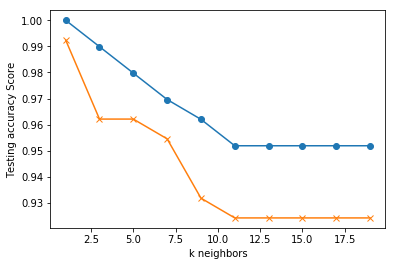

In [12]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.955


k: 1, Train/Test Score: 1.000/0.992
k: 3, Train/Test Score: 0.995/0.970
k: 5, Train/Test Score: 0.995/0.970
k: 7, Train/Test Score: 0.990/0.962
k: 9, Train/Test Score: 0.967/0.947
k: 11, Train/Test Score: 0.967/0.947
k: 13, Train/Test Score: 0.967/0.947
k: 15, Train/Test Score: 0.967/0.947
k: 17, Train/Test Score: 0.967/0.947
k: 19, Train/Test Score: 0.962/0.939


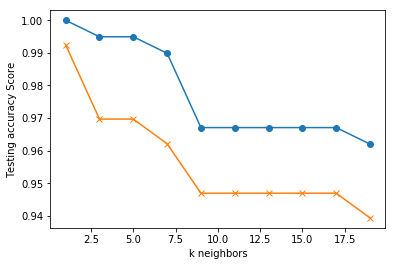

In [14]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    train_score = knn.score(X2_train, y2_train)
    test_score = knn.score(X2_test, y2_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X2_train, y2_train)
print('k=11 Test Acc: %.3f' % knn.score(X2_test, y2_test))

k=11 Test Acc: 0.947


k: 1, Train/Test Score: 1.000/0.992
k: 3, Train/Test Score: 0.995/0.970
k: 5, Train/Test Score: 0.995/0.970
k: 7, Train/Test Score: 0.995/0.970
k: 9, Train/Test Score: 0.977/0.955
k: 11, Train/Test Score: 0.977/0.955
k: 13, Train/Test Score: 0.977/0.955
k: 15, Train/Test Score: 0.967/0.947
k: 17, Train/Test Score: 0.967/0.947
k: 19, Train/Test Score: 0.965/0.947


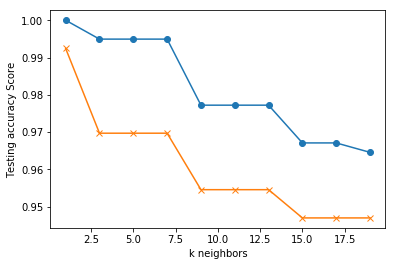

In [16]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X3_train, y3_train)
    train_score = knn.score(X3_train, y3_train)
    test_score = knn.score(X3_test, y3_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X3_train, y3_train)
print('k=13 Test Acc: %.3f' % knn.score(X3_test, y3_test))

k=13 Test Acc: 0.955
